In [21]:
import os
import zipfile

# Extract files from the ZIP archive
with zipfile.ZipFile('/content/Property_data-20250109T054401Z-001.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

    # List all files in the extracted directory
    extracted_files = os.listdir('/content/Property_data')
    print(extracted_files)

    # Initialize an empty list to store individual DataFrames
    property_data_list = []

    # Load and merge all CSV files from the extracted folder
    for file in extracted_files:
        if file.endswith('.csv'):
                file_path = os.path.join('/content/Property_data', file)
                property_data = pd.read_csv(file_path)
                property_data_list.append(property_data)

                                # Combine all individual DataFrames into one
                property_data_combined = pd.concat(property_data_list, ignore_index=True)

                                # Check the shape of the final combined DataFrame
                print(f"Total Rows: {property_data_combined.shape[0]}")
                print(f"Total Columns: {property_data_combined.shape[1]}")

                                # Sample output to verify the combined data
                print(property_data_combined.head())


['Bommanahalli.csv', 'Hongasandra.csv', 'Krishnarajapura.csv', 'Thanisandra.csv', 'Konanakunte.csv', 'Varthur.csv', 'Mathikere.csv', 'Nagarbhavi.csv', 'Vijaya Nagar.csv', 'Akshayanagar.csv', 'Hoodi.csv', 'Mahadevapura.csv', 'Yelahanka.csv', 'HBR Layout.csv', 'Electronics City Phase 1.csv', 'Kumaraswamy Layout.csv', 'Munnekollal.csv', 'Basavanagudi.csv', 'Padmanabhanagar.csv', 'Hosakerehalli.csv', 'K.R Puram.csv', 'Indiranagar.csv', 'Kengeri Satellite Town.csv', 'Gottigere.csv', 'Hulimavu.csv', 'Singasandra.csv', 'Rajaji Nagar.csv', 'Sunkadakatte.csv', 'Subramanyapura.csv', 'RT Nagar.csv', 'Bilekahalli.csv', 'Kadugodi.csv', 'Arekere.csv', 'Ejipura.csv', 'Jayanagar.csv', 'JP Nagar.csv', 'Uttarahalli Hobli.csv', 'Kengeri.csv', 'RR Nagar.csv', 'Horamavu.csv', 'Begur.csv', 'Kaggadasapura.csv', 'Yelahanka New Town.csv', 'Marathahalli.csv', 'Vidyaranyapura.csv', 'Bellandur.csv', 'Property_data', 'Whitefield.csv', 'Koramangala.csv', 'BTM_Layout.csv', 'Ramamurthy Nagar.csv', 'Chikkalasandra.csv

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [22]:
# Cell 1: Import libraries and load data

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

# Load the datasets (assumed to be uploaded to Google Colab)
#property_data = pd.read_csv('property_data.csv')  # Replace with your file path
property_photos_data = pd.read_csv('/content/property_photos.tsv', delimiter='\t')  # Replace with your file path
property_interactions_data = pd.read_csv('/content/property_interactions.csv')  # Replace with your file path

# Display the first few rows of each dataset to verify
#print(property_data.head())
print(property_photos_data.head())
print(property_interactions_data.head())


                        property_id  \
0  ff808081469fd6e20146a5af948000ea   
1  ff8080814702d3d10147068359d200cd   
2  ff808081470c645401470fb03f5800a6   
3  ff808081470c6454014715eaa5960281   
4  ff808081474aa867014771a0298f0aa6   

                                          photo_urls  
0  [{\title\":\"Balcony\",\"name\":\"IMG_20131006...  
1                                                NaN  
2  [{\title\":\"Bedroom\",\"name\":\"ff808081470c...  
3  [{\title\":\"Bedroom\",\"name\":\"Screenshot_7...  
4  [{\title\":\"Other\",\"name\":\"ff808081474aa8...  
                        property_id         request_date
0  ff808081469fd6e20146a5af948000ea  2017-03-10 17:42:34
1  ff808081469fd6e20146a5af948000ea  2017-03-09 15:51:17
2  ff808081469fd6e20146a5af948000ea  2017-03-10 17:30:22
3  ff808081469fd6e20146a5af948000ea  2017-03-11 17:48:46
4  ff8080814702d3d10147068359d200cd  2017-03-30 19:59:15


In [23]:
property_data_cleaned = property_data.merge(property_photos_data, on='property_id', how='left')

def clean_photo_urls(photo_urls):
    try:
        photo_list = json.loads(photo_urls)
        return len(photo_list)
    except:
        return 0

property_data_cleaned['photo_count'] = property_data_cleaned['photo_urls'].apply(clean_photo_urls)

property_data_cleaned = property_data_cleaned.merge(property_interactions_data.groupby('property_id').size().reset_index(name='total_interactions'), on='property_id', how='left')

property_data_cleaned['total_interactions'].fillna(0, inplace=True)

print(property_data_cleaned.head())


                        property_id  type   activation_date  bathroom  floor  \
0  ff8081814cb771fb014cd0da99ac5272  BHK2  03-02-2017 15:46         2      1   
1  ff8081814d1e1f05014d1e3950c600cb  BHK2  07-02-2017 17:40         2      1   
2  ff8081814ee47e27014eecb6aaee26a5  BHK1  05-03-2017 18:05         1      3   
3  ff8081814f0cb8cb014f11a71fc01c8f  BHK2  23-03-2017 22:50         2      1   
4  ff8081814f281da5014f2acc98da05be  BHK2  27-03-2017 17:14         2      1   

   total_floor      furnishing  gym   latitude  longitude  ... property_age  \
0          5.0  SEMI_FURNISHED    0  13.037166  77.605234  ...            6   
1          1.0  SEMI_FURNISHED    0  13.050519  77.598733  ...            0   
2          3.0  SEMI_FURNISHED    0  13.052831  77.579043  ...            3   
3          4.0  SEMI_FURNISHED    1  13.028166  77.604238  ...            1   
4          3.0  SEMI_FURNISHED    0  13.033265  77.609029  ...            0   

   property_size swimming_pool  pin_code   r

<ipython-input-23-721a01974727>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  property_data_cleaned['total_interactions'].fillna(0, inplace=True)


In [25]:
def categorize_property_age(age):
    if age <= 1:
        return 'New'
    elif age <= 5:
        return 'Less than 5 years'
    elif age <= 10:
        return '5 to 10 years'
    elif age <= 20:
        return '10 to 20 years'
    else:
        return 'More than 20 years'

property_data_cleaned['property_age_category'] = property_data_cleaned['property_age'].apply(categorize_property_age)

#property_data_cleaned['activation_date'] = pd.to_datetime(property_data_cleaned['activation_date'])
property_data_cleaned['activation_date'] = pd.to_datetime(property_data_cleaned['activation_date'], format='%d-%m-%Y %H:%M')


property_data_cleaned['activation_hour'] = property_data_cleaned['activation_date'].dt.hour

def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Midnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

property_data_cleaned['time_category'] = property_data_cleaned['activation_hour'].apply(categorize_time)

print(property_data_cleaned[['property_id', 'property_age_category', 'time_category']].head())


                        property_id property_age_category time_category
0  ff8081814cb771fb014cd0da99ac5272         5 to 10 years     Afternoon
1  ff8081814d1e1f05014d1e3950c600cb                   New     Afternoon
2  ff8081814ee47e27014eecb6aaee26a5     Less than 5 years       Evening
3  ff8081814f0cb8cb014f11a71fc01c8f                   New       Evening
4  ff8081814f281da5014f2acc98da05be                   New     Afternoon


locality
Hebbal    13335.978836
Name: rent, dtype: float64
Afternoon


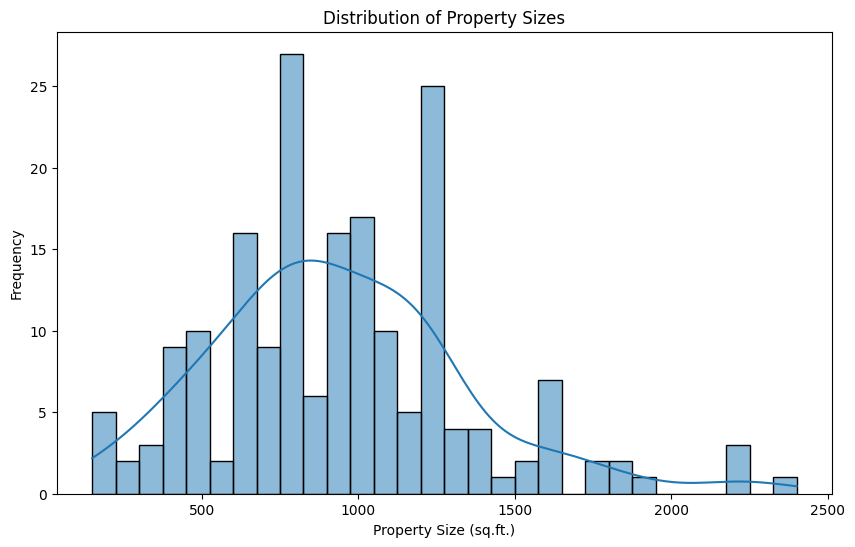

EDA completed and cleaned data saved as 'cleaned_property_data.csv'


In [26]:
avg_rent_by_locality = property_data_cleaned.groupby('locality')['rent'].mean().sort_values(ascending=False)
print(avg_rent_by_locality.head())

most_frequent_time_category = property_data_cleaned['time_category'].value_counts().idxmax()
print(most_frequent_time_category)

plt.figure(figsize=(10, 6))
sns.histplot(property_data_cleaned['property_size'], kde=True, bins=30)
plt.title('Distribution of Property Sizes')
plt.xlabel('Property Size (sq.ft.)')
plt.ylabel('Frequency')
plt.show()

property_data_cleaned.to_csv('cleaned_property_data.csv', index=False)

print("EDA completed and cleaned data saved as 'cleaned_property_data.csv'")
